In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/HR.csv")

In [4]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

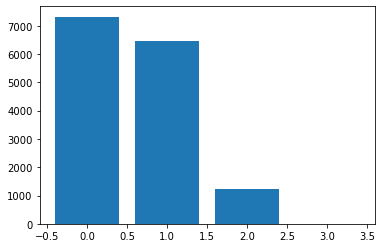

In [5]:
plt.bar(np.arange(len(df["salary"].value_counts())), df["salary"].value_counts())
plt.show()

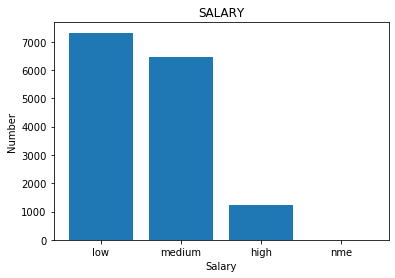

In [6]:
plt.title("SALARY")
plt.xlabel("Salary")
plt.ylabel("Number")
plt.xticks(np.arange(len(df["salary"].value_counts())), df["salary"].value_counts().index)
plt.bar(np.arange(len(df["salary"].value_counts())), df["salary"].value_counts())
plt.show()

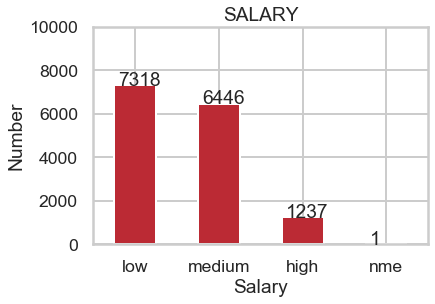

In [12]:
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))
plt.title("SALARY")
plt.xlabel("Salary")
plt.ylabel("Number")
plt.axis([0, 4, 0, 10000])
plt.xticks(np.arange(len(df["salary"].value_counts())) + 0.5, df["salary"].value_counts().index)
plt.bar(np.arange(len(df["salary"].value_counts())) + 0.5, df["salary"].value_counts(), width=0.5)
for x, y in zip(np.arange(len(df["salary"].value_counts())) + 0.3, df["salary"].value_counts()):
    plt.text(x, y, y)
plt.show()

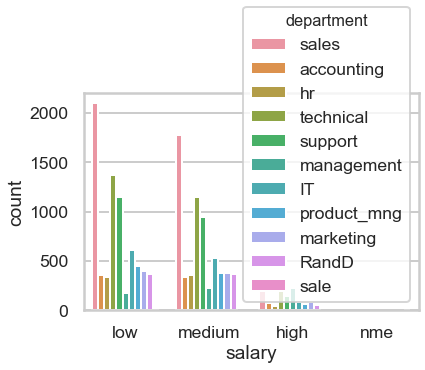

In [14]:
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))
sns.countplot(x="salary", hue="department", data=df)
plt.show()

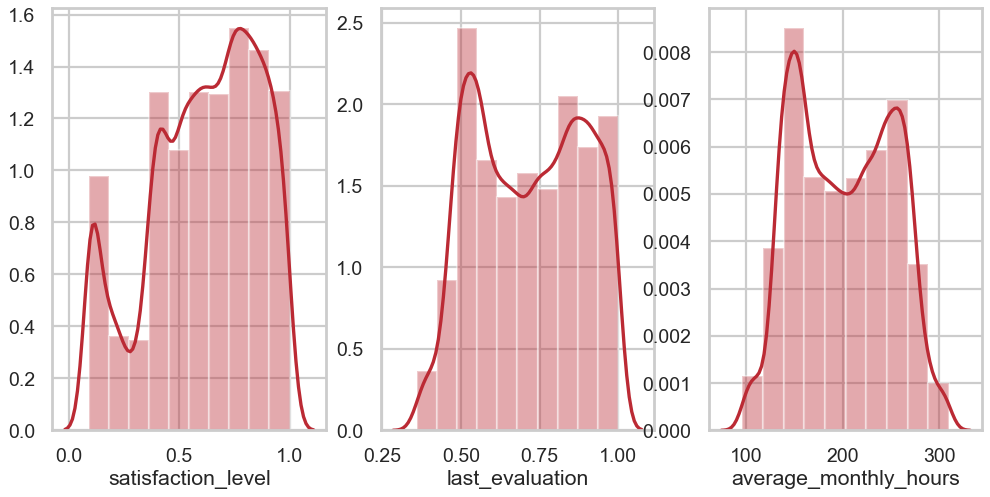

In [38]:
df = df.dropna(how="any", axis=0)
# df = df[df["last_evaluation"] < 1][df["salary"] != "nme"][df["department"] = "sale"]
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))
f = plt.figure(figsize=[15, 7], dpi=80)
f.add_subplot(1, 3, 1)
sns.distplot(df["satisfaction_level"], bins=10)  # kde：控制曲线的产生， hist：控制直方图的产生

f.add_subplot(1, 3, 2)
sns.distplot(df["last_evaluation"], bins=10)

f.add_subplot(1, 3, 3)
sns.distplot(df["average_monthly_hours"], bins=10)
plt.show()

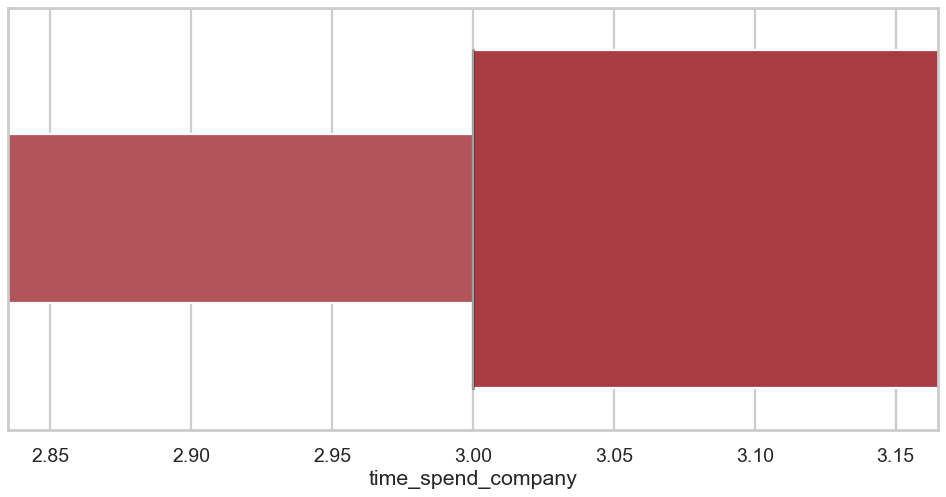

In [48]:
f = plt.figure(figsize=[15, 7], dpi=80)
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))

sns.boxenplot(x=df["time_spend_company"], saturation=0.75)
plt.show()

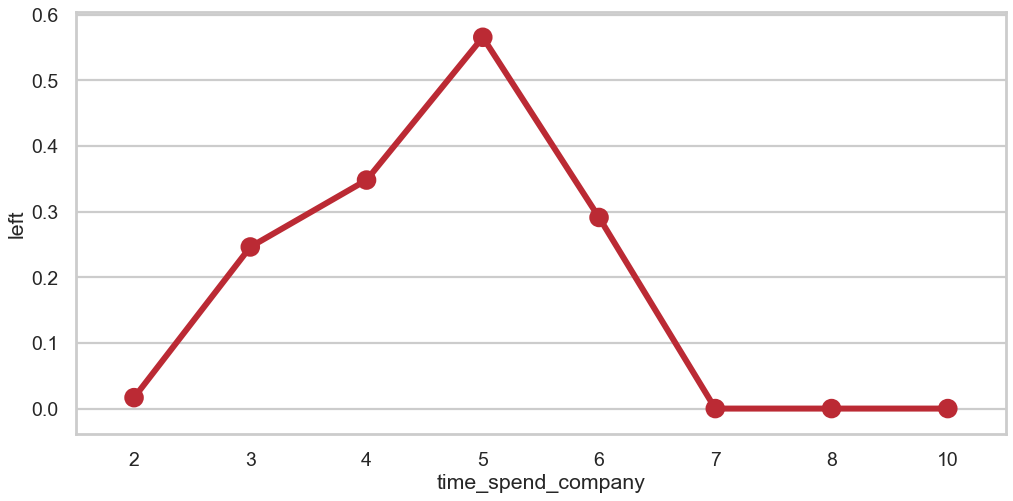

In [49]:
f = plt.figure(figsize=[15, 7], dpi=80)
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))

sub_df = df.groupby("time_spend_company").mean()
sns.pointplot(sub_df.index, sub_df["left"])
plt.show()

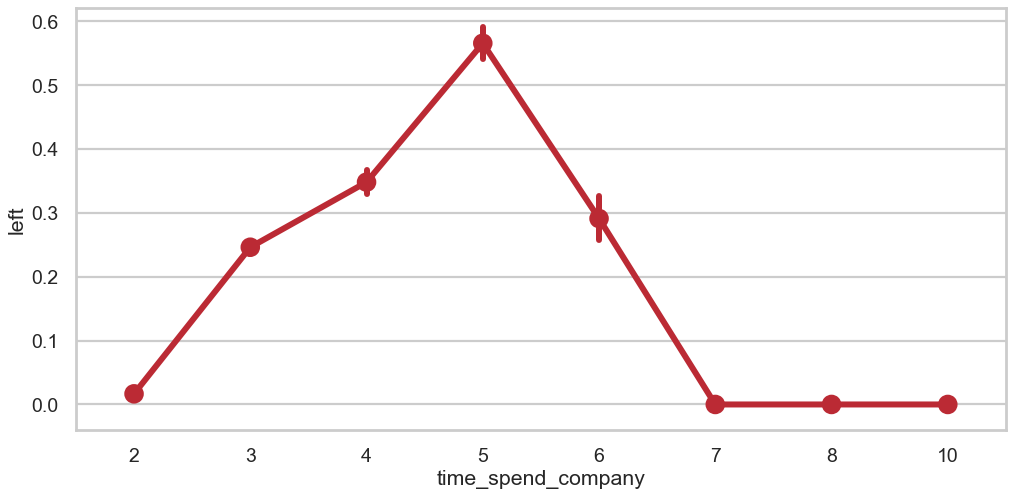

In [50]:
f = plt.figure(figsize=[15, 7], dpi=80)
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))

sns.pointplot(x="time_spend_company", y="left", data=df)
plt.show()

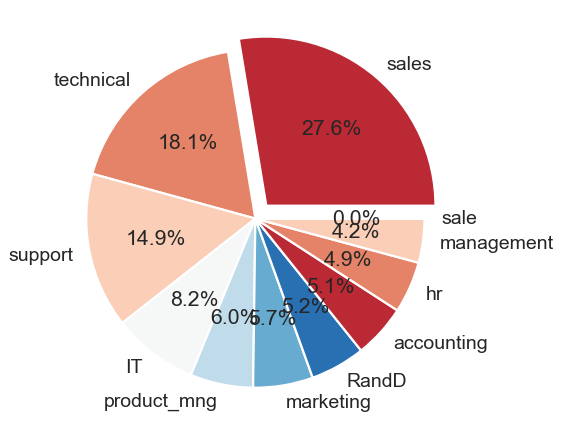

In [57]:
f = plt.figure(figsize=[15, 7], dpi=80)
sns.set_style(style="whitegrid")
sns.set_context(context="poster", font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))

lbs = df["department"].value_counts().index
explodes = [0.1 if i == "sales" else 0 for i in lbs]
# plt.pie(df["department"].value_counts(normalize=True), labels=lbs, autopct="%1.1f%%")
# plt.pie(df["department"].value_counts(normalize=True), explode=explodes, labels=lbs, autopct="%1.1f%%", colors=sns.color_palette("Reds"))
plt.pie(df["department"].value_counts(normalize=True), explode=explodes, labels=lbs, autopct="%1.1f%%")
plt.show()